# **Fitness Product analysis by analysing and visualising data based on consumer characteristics**   
###By Prabal Singh and Aditya Raj Soni
A market research team is assigned the task to identify the profile of the typical customer for each treadmill product offered by Fitness for Everyone. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a Fitness for Everyone retail store during the prior three months. The team identifies the following customer variables to study:

**Data**  
Product: Product purchased - FE285, FE580, or FE605  
Age: Age in years  
gender: Male/Female  
Education: Years of education received  
MaritalStatus: relationship status - single or partnered  
Usage: Average number of times the customer plans to use the treadmill each week  
Fitness: Self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.  
Income: Annual household income ($)    
Miles: Average number of miles the customer expects to walk/run each week


**Introduction**  
Questions:  
1) Which gender uses the treadmill the most?  
2) Is there a correlation between miles, fitness and the product?If yes, which
  type of correlation is it?
  
3) Do the users of all 3 products have the same earnings?  
4) Are the mean miles run on each product significantly different?  
5) Is the mean usage of the product used by similar income groups the same?

**Methods used**

*   Used the Pandas library to create a dataframe.
*   Imported matplotlib.pyplot to create a bar chart.
*   Used seaborn to visualise the data and plot a scatter plot
*   Used lmplot to find out the correlation in the data
*   Used scipy.stats to find the t-statistic and p-value
*   Used the grand mean and sum of squares formula when calculating the values for one-way ANOVA.











We are creating a dataframe by using the pandas library and loading the data into the data frame

In [ ]:
#creating a dataframe
import pandas as pd

data_url = 'https://raw.githubusercontent.com/csbfx/cs22a/main/fitness.csv'

fitness_df = pd.read_csv(data_url)
fitness_df


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,FE284,18,Male,14,Single,3,4,29562,112
1,FE284,19,Male,15,Single,2,3,31836,75
2,FE284,19,Female,14,Partnered,4,3,30699,66
3,FE284,19,Male,12,Single,3,3,32973,85
4,FE284,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,FE605,40,Male,21,Single,6,5,83416,200
176,FE605,42,Male,18,Single,5,4,89641,200
177,FE605,45,Male,16,Single,5,5,90886,160
178,FE605,47,Male,18,Partnered,4,5,104581,120


Plot a bar chart to represent the usage of treadmills based on genders.


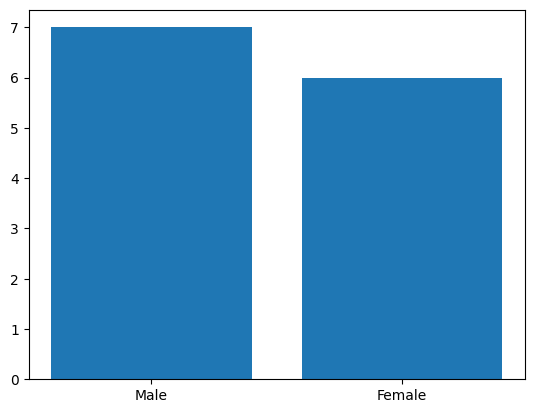

In [ ]:
import matplotlib.pyplot as plt
plt.bar(data = fitness_df, x ='Gender', height = 'Usage');

Males use the treadmills greater number of times a week than females.

Plot a scatter plot to see the relationship between miles and fitness, representing products with different colours.



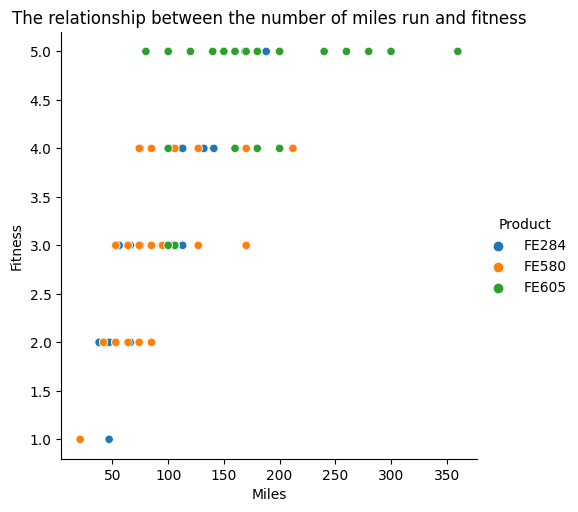

In [ ]:
import seaborn as sns
sns.relplot(data = fitness_df, x = "Miles", y = "Fitness", hue = 'Product')
plt.title('The relationship between the number of miles run and fitness')
plt.show()


As the miles run increases, the fitness increases. The users of product FE605 have the greatest fitness.

based on the graph plotted above, find the correlation co-efficient and plot the line of best fit.



The Pearson correlation coeffient between miles and fitness is 0.786


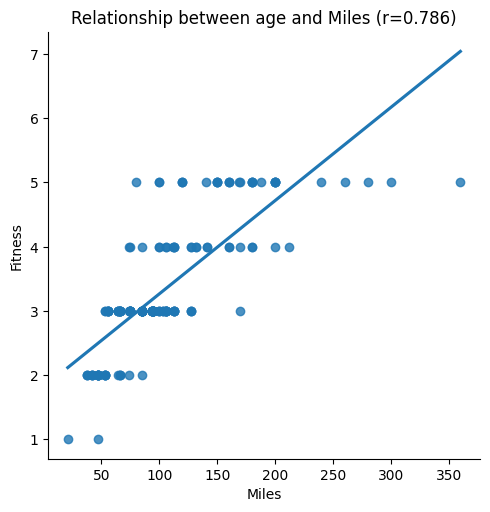

In [ ]:
miles = fitness_df.Miles
fitness = fitness_df.Fitness

r_miles_fitness = round(miles.corr(fitness),3)

print(f"The Pearson correlation coeffient between miles and fitness is {r_miles_fitness}")
sns.lmplot(
    data=fitness_df,
    x='Miles',
    y='Fitness',
    ci=None
).set(title=f"Relationship between age and Miles (r={r_miles_fitness})");


There is a strong positive correlation. Positive because r > 0 and strong because the value is nearer to 1.

Plot a bar chart to see the relationship between the products used and income levels.


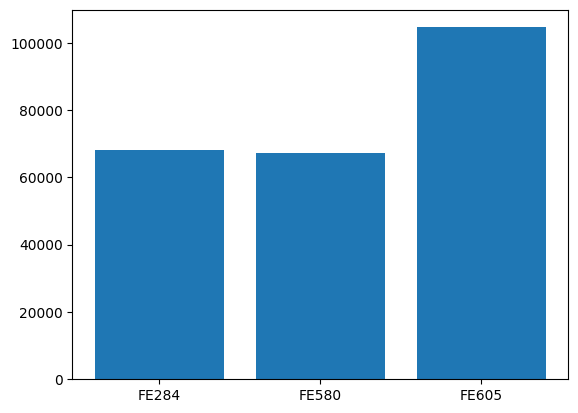

In [ ]:
plt.bar(data = fitness_df, x ='Product', height = 'Income');

FE605 users have the highest income. FE284 and FE580 users have a comparatively lower income than FE605, however, FE284 users and FE580 users have users with similar income.

**one-way ANOVA**  
Means of miles for three products are compared.
Firstly, we filter the data based upon the miles. Next, we calculate the mean miles for each product. Because the sample size is not the same for all three products, we would calculate the grand mean differently.


In [ ]:
#filtering values based on the products
FE284_miles = fitness_df[fitness_df.Product =='FE284']
FE580_miles = fitness_df[fitness_df.Product =='FE580']
FE605_miles = fitness_df[fitness_df.Product =='FE605']

#find mean for the miles run on each product
FE284_mean = FE284_miles.Miles.mean()
FE580_mean = FE580_miles.Miles.mean()
FE605_mean = FE605_miles.Miles.mean()

#find the grand mean
grand_mean = (sum(FE284_miles.Miles) + sum(FE580_miles.Miles) + sum(FE605_miles.Miles))/(len(FE284_miles)
+ len(FE580_miles) + len(FE605_miles))

print(f"FE284 miles mean:{round(FE284_mean,2)}")
print(f"FE580 miles mean:{round(FE580_mean,2)}")
print(f"FE605 miles mean:{FE605_mean}")
print(f"Grand mean:{round(grand_mean,2)}")





FE284 miles mean:82.79
FE580 miles mean:87.93
FE605 miles mean:166.9
Grand mean:103.19


Means for the miles run on FE284 and FE580 are almost similar. However, it is significantly different for FE605. On average, people run/walk greater miles on FE605 as compared to FE284 and FE580.

Between-group variability is the the deviation of each sample mean from eachother.

In [ ]:
ss_between = (len(FE284_miles)*((FE284_mean-grand_mean)**2)) + (len(FE580_miles)*
 ((FE580_mean-grand_mean)**2))+ (len(FE605_miles)*((FE605_mean-grand_mean)**2))

print(f"SS_between: {ss_between}")

SS_between: 209625.47361111114


Because the value is large, more likely population means will differ significantly.


Created a function with two arguments that takes a list of values and a mean and returns a list of squared deviations

In [ ]:
def squared_dev(values_list, mean):
  sq_dev = []
  for xi in values_list:
    sq_dev.append((xi - mean)**2)

  return sq_dev


calculate within group variablitity, ie variability of individual samples

In [ ]:
FE284_sq_dev = squared_dev(FE284_miles.Miles, FE284_mean)
FE580_sq_dev = squared_dev(FE580_miles.Miles, FE580_mean)
FE605_sq_dev = squared_dev(FE605_miles.Miles, FE605_mean)
ss_within = sum(FE284_sq_dev) + sum(FE580_sq_dev) + sum(FE605_sq_dev)
print(f"SS_within: {ss_within}")

SS_within: 271854.7208333332


The greater the variability of each individual sample, the less likely population means will differ significantly


**null hypothesis**(no significant difference between any of the samples)
Ho : μ1 = μ2 = μ3  
**Alternate hypothesis**
HA : At least one pair of samples is significantly different

We are finding degrees of freedom within and between groups.

In [ ]:
k = 3 #number of groups
df_between = k - 1 #degree of freedom

N = (len(FE284_miles) + len(FE580_miles) + len(FE605_miles)) #total number of values from all 3 groups
df_within = N - k

print(f"df_between: {df_between}")
print(f"df_within: {df_within}")

df_between: 2
df_within: 177


In [ ]:
ms_between = ss_between / df_between
ms_within = ss_within / df_within

print(f"MS_between: {ms_between}")
print(f"MS_within: {ms_within}")

MS_between: 104812.73680555557
MS_within: 1535.9023775894532


In [ ]:
F = ms_between / ms_within
print(f"F-statistic: {F}")

F-statistic: 68.24179605090241


In [ ]:
#alpha level = 0.05
F_crit = 3.046

In [ ]:
if F > F_crit:
  print('Reject the null')
else:
  print('Retain the null')

Reject the null


Since we reject the null in favor of the alternative, it means at least one product has significantly different number of miles run.

**T-Test**  
 An independent two sample t-test/ Welch's T-test can be  used to determine if two population means are equal.

For example, suppose we want to know if using two different products used by the same income class lead to different mean for usage of the treadmill

Null hypothesis: H0: u1 = u2  
Alternate: H1: u1 =! u2
alpha = 0.05

In [ ]:
from scipy.stats import ttest_ind
group1 = fitness_df[fitness_df['Product']== 'FE284']
group2 = fitness_df[fitness_df['Product'] == 'FE580']


We will calculate the variance of the usage of both products  
If the variance is the same, we will perform the Independent Two Sample t-Test. If the variance is not the same, we do the Welch's T-test.

In [ ]:
print(group1.Usage.var())
print(group2.Usage.var())

0.6125
0.6395480225988701


Because the variance is not the same, we need to do the Welch's T-test- which assumes that two populations do not have the same variance.




In [ ]:
results_2 = ttest_ind(group1['Usage'], group2['Usage'], equal_var = False)

# p-value:
print(f"P-Value: {round(results_2.pvalue,2)}")

# t-statistic:
print(f"T-Statistic:  {round(results_2.statistic,2)}")


P-Value: 0.88
T-Statistic:  0.15


the p-value is greater than 0.05, we can not reject the null hypothesis of the t-test and conclude that there is not enough evidence to say that two products have the same usage.

#Conclusion
Males are more likely to use the prodcts than females so marketing strategies need to be formed that are target males. By looking at the calculations made above, I can conclude that FE605 is more expensive than 2 other products. This is because higher income groups have purchased it and the number of units sold in these 3 months are much lower than the other 2 products.  FE284  and FE580 have the same usage. However, the miles run on each of these products is significantly different.
The improvement can be made by including the price of the products, collecting data on the sales of the products for more than 3 months.